<a href="https://colab.research.google.com/github/mriah22/Bio125-Fall/blob/main/lab10data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [5]:
data = pd.read_csv (r'./EKG_data_1.txt', sep = '\t')
data

,Time,ECG
0,0.000,0.0
1,0.005,0.0
2,0.010,0.0
3,0.015,0.0
4,0.020,0.0
...,...,...
39790,NaN,NaN
39791,NaN,NaN
39792,NaN,NaN
39793,NaN,NaN


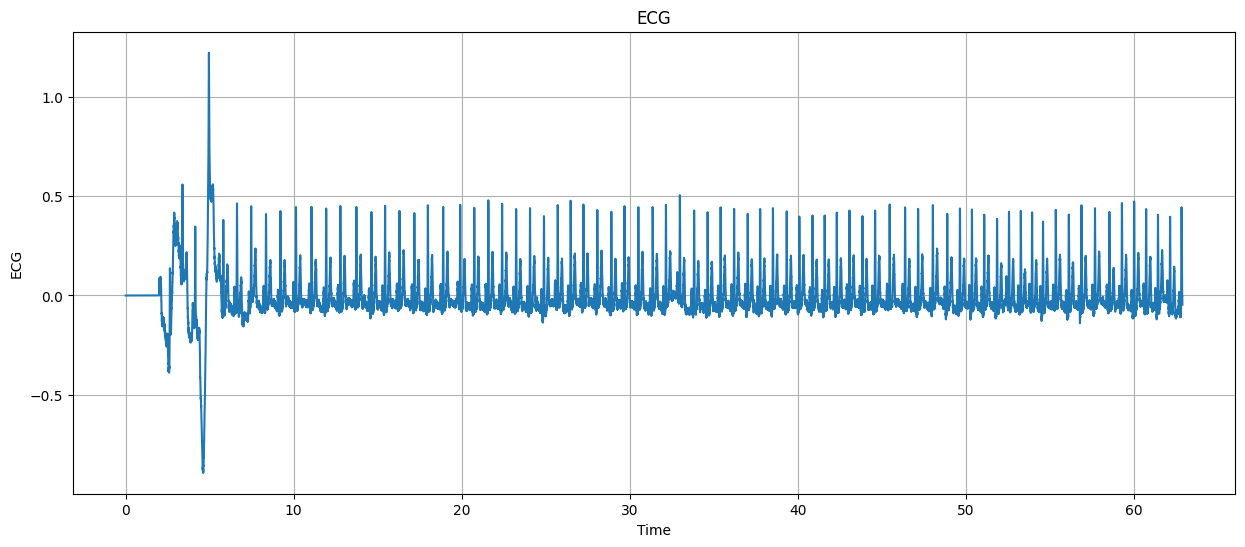

In [9]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['ECG'])
plt.xlabel('Time')
plt.ylabel('ECG')
plt.title('ECG')
plt.grid(True)
plt.show()

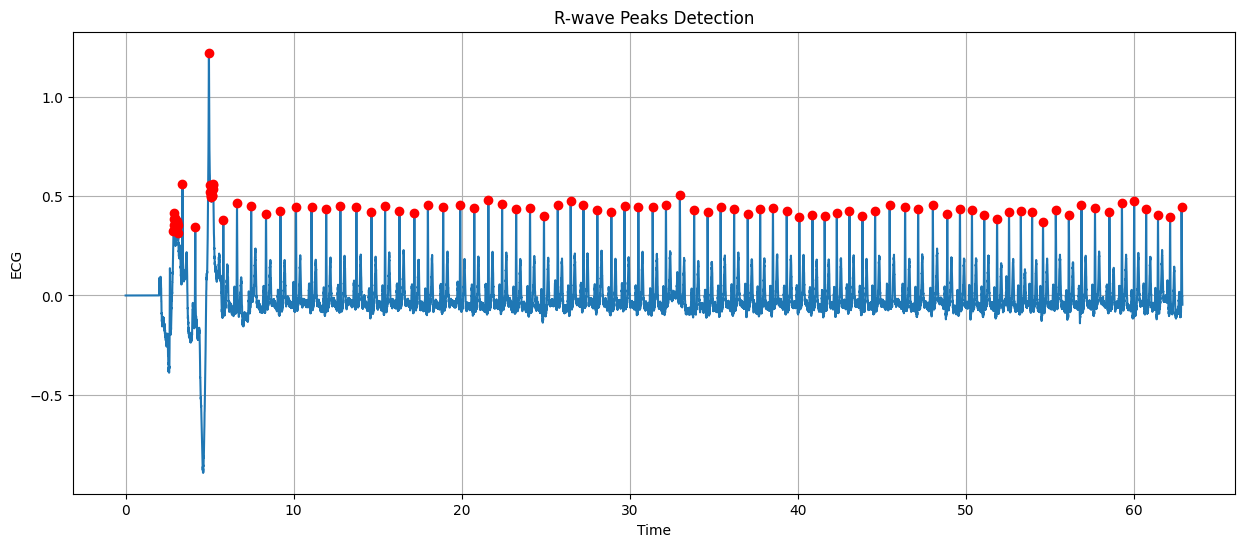

In [10]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['ECG'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['ECG'])
plt.plot(df['Time'].iloc[peak_indices], df['ECG'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

In [11]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")

Average RR interval: 0.61 seconds
Heart rate: 98.99 BPM


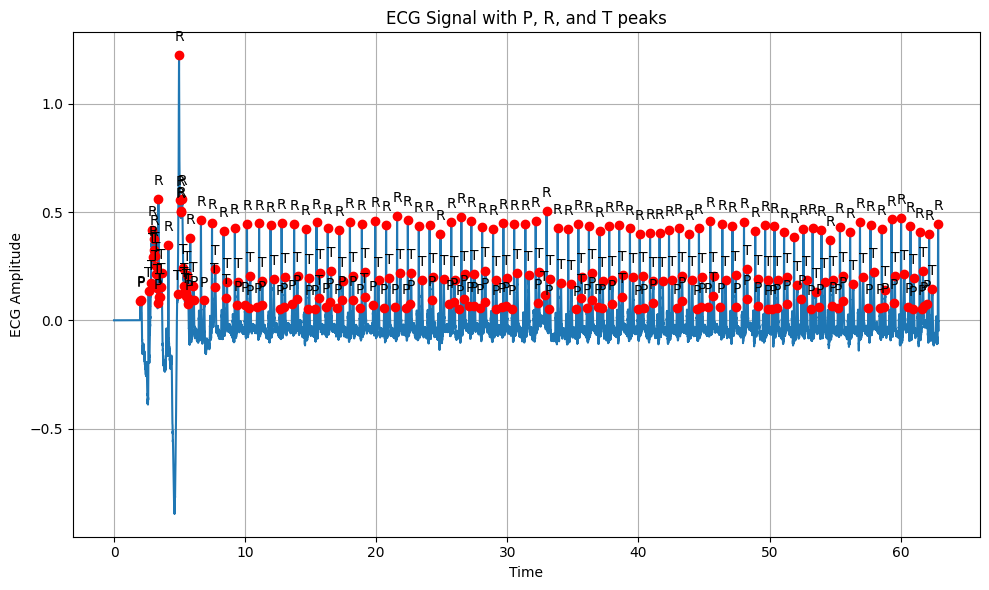

In [13]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['ECG'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.1 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else:
        return 'P'

labels = [classify_peak(df['ECG'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['ECG'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['ECG'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['ECG'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('ECG Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

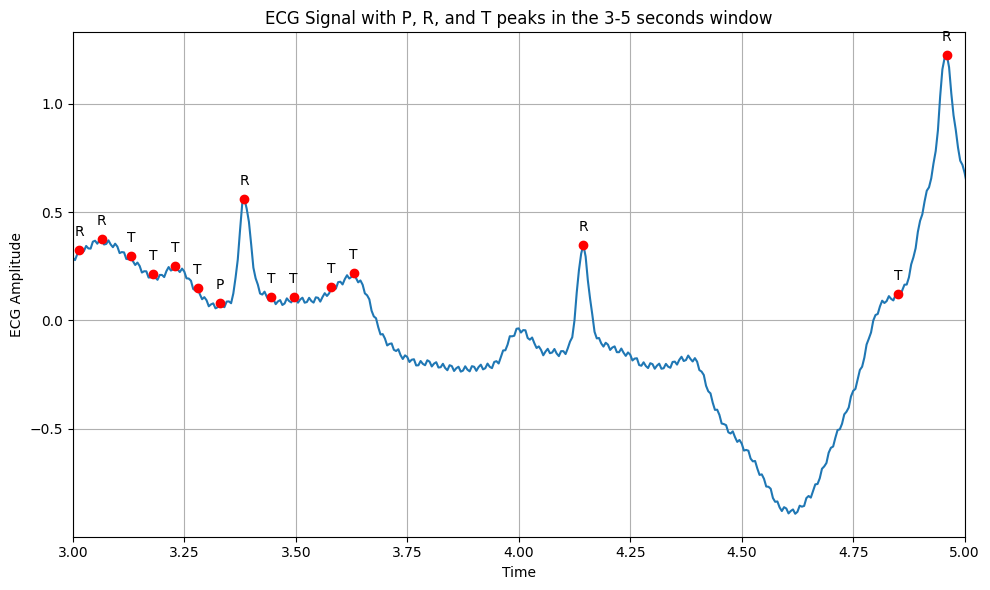

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['ECG'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['ECG'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['ECG'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('ECG Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(3, 5)

plt.tight_layout()
plt.show()